In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
from sklearn.utils import shuffle
from numpy import load

In [2]:
X_train=load('X_train_sr.npy')
y_train=load('y_train_sr.npy')
X_test=load('X_test_sr.npy')
y_test=load('y_test_sr.npy')

In [3]:
from sklearn.model_selection import train_test_split

In [4]:
X_train,y_train=shuffle(X_train,y_train,random_state=0)

In [5]:
X_train,X_val,y_train,y_val=train_test_split(X_train,y_train,test_size=0.15,random_state=42)

In [6]:
model=keras.models.load_model('final_model_sign_recognisation.h5')

In [7]:
class_names=['A','B','C','D','E','F','G','H','I','J','K','L','M','N','O','P','Q','R','S','T','U','V','W','X','Y','Z','del','nothing','space']


In [8]:
predictions=model.predict([X_val])

In [9]:
import cv2

In [10]:
cv2.imshow('image',X_val[0])
cv2.waitKey(0)
cv2.destroyAllWindows()

In [12]:
class_names[y_val[0]]

'B'

In [13]:
class_names[np.argmax(predictions[0])]

'B'

In [14]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

In [15]:
import matplotlib.pyplot as plt

<AxesSubplot:>

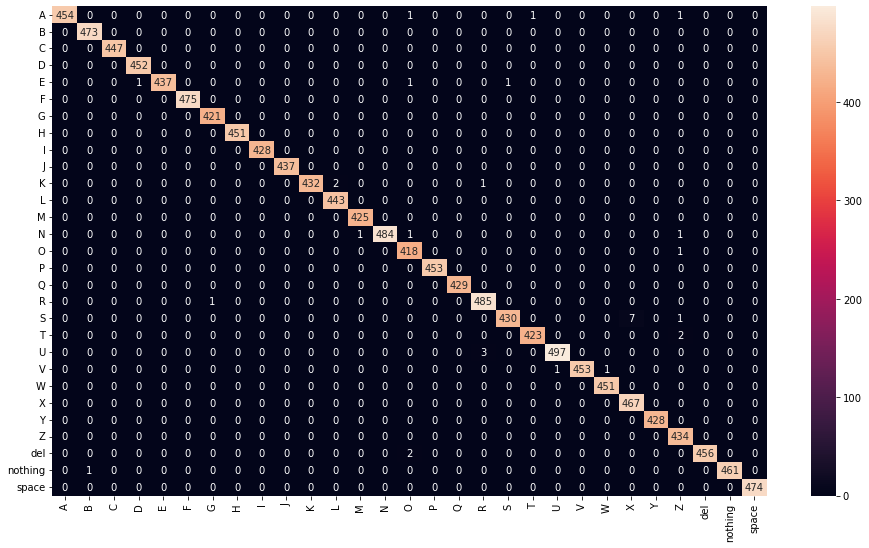

In [16]:
plt.figure(figsize=(16,9))
y_pred_labels=[np.argmax(label) for label in predictions]
cm=confusion_matrix(y_val,y_pred_labels)
sns.heatmap(cm,annot=True,fmt='d',xticklabels=class_names,yticklabels=class_names)

In [17]:
from sklearn.metrics import classification_report

In [18]:
cr=classification_report(y_val,y_pred_labels,target_names=class_names)
print(cr)

              precision    recall  f1-score   support

           A       1.00      0.99      1.00       457
           B       1.00      1.00      1.00       473
           C       1.00      1.00      1.00       447
           D       1.00      1.00      1.00       452
           E       1.00      0.99      1.00       440
           F       1.00      1.00      1.00       475
           G       1.00      1.00      1.00       421
           H       1.00      1.00      1.00       451
           I       1.00      1.00      1.00       428
           J       1.00      1.00      1.00       437
           K       1.00      0.99      1.00       435
           L       1.00      1.00      1.00       443
           M       1.00      1.00      1.00       425
           N       1.00      0.99      1.00       487
           O       0.99      1.00      0.99       419
           P       1.00      1.00      1.00       453
           Q       1.00      1.00      1.00       429
           R       0.99    

In [19]:
pred_y_test=model.predict(X_test)

In [20]:
for i in range(28):
    print('Labels : ',class_names[y_test[i]],'       ','Predicted value : ',class_names[np.argmax(pred_y_test[i])])

Labels :  A         Predicted value :  A
Labels :  B         Predicted value :  B
Labels :  C         Predicted value :  C
Labels :  D         Predicted value :  D
Labels :  E         Predicted value :  E
Labels :  F         Predicted value :  F
Labels :  G         Predicted value :  G
Labels :  H         Predicted value :  H
Labels :  I         Predicted value :  I
Labels :  J         Predicted value :  J
Labels :  K         Predicted value :  K
Labels :  L         Predicted value :  L
Labels :  M         Predicted value :  M
Labels :  nothing         Predicted value :  nothing
Labels :  N         Predicted value :  N
Labels :  O         Predicted value :  O
Labels :  P         Predicted value :  P
Labels :  Q         Predicted value :  Q
Labels :  R         Predicted value :  R
Labels :  space         Predicted value :  space
Labels :  S         Predicted value :  S
Labels :  T         Predicted value :  T
Labels :  U         Predicted value :  U
Labels :  V         Predicted value :